<a href="https://colab.research.google.com/github/roobiks-cube/miscellaneous/blob/main/Semesterarbeit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semesterarbeit

Erste Vorgehensweise:

- Erstellung der Spektrogramme. Daraus werde Binary Dateien erstellt, um diese bei einem Neustart einlesen zu können, um eine lange Runtime vermeiden zu können.
- Erstellung der Klasssen.
- Train Test Split.

Zweite Vorgehensweise mit "Linear SVM Classification Model":

- RandomizedSearchCV verwenden, um die besten Werte zu erhalten. Diese besten Parameter werden als Binary geschieben, um eine lange Runtime vermeiden zu können.
- SGD Classifier wird verwendet, LinearSVC(C=1, random_state=42) alleine braucht mehr als 18 Minuten und wird somit nicht mehr verwendet.
- Das Model wird verwendet und die Resultate ebenfalls als Binary Datei erstellt, um eine lange Runtime vermeiden zu können.
- Train-Accuracy und Test-Accuracy wird berechnet.
- Cross Validaton Score wird berechnet.
- Cross Validation Predict wird berechnet und dargestellt.
- Cross Validation Predict wird als Confusion Matrix dargestellt.
- Thrershold Test um sehen zu können, welche Klassen erkannt werden.
- Accuracy von Cross Validation Predict wird berechnet.
- Precision, Recall und F1 wird berechnet.
- Classification Report wird dargestellt.

Dritte Vorgehensweise "PCA & SGD Classifier":

- Randomized und Incremental PCA werden angewendet, das Model ist ebenfalls SGD Classifier.
- Precision and Recall for incremental PCA und randomized PCA.
- Classifiaction Report für incremental PCA und randomize PCA.

Vierte Vorgehensweise "Polynomial Kernel":
- GridSearchCV.
- Polynomial Kernel.
- Accuracy.
- Precision and Recall.
- Precision und Recall mit incremental PCA.
- Precision und Recall mit randomized PCA.
- Cross Valiation Predict.
- Darstellung von Cross Validation Predict als Confusion Matrix.
- Accuracy von Cross Validation Predict.
- Threshold Test

Fünfte Vorgehensweise "RBF Kernel":
- GridSearchCV.
- RBF Kernel.
- Train Accuracy und Test Accuracy.
- Cross Validation Predict.
- Precision, Recall, F1 Score.
- Darstellung von Cross Validation Predict als Confusion Matrix.
- Accuracy der Cross Validation Predict.
- Threshold Test.

Sechste Vorgehensweise "ANN & CNN":

**todo**



Siebte Vorgehensweise "KNN":

Inhalte bereits vorhanden, wird weiter angesehen, falls genügend Zeit vorhanden ist.


Achte Vorgehensweise "Random Forest":

Inhalte bereits vorhanden, wird weiter angesehen, falls genügend Zeit vorhanden ist.

Import

In [ ]:
import keras
print(keras.__version__)
import pandas as pd
import os
import librosa
import torch
import torchaudio
import numpy as np
torchaudio.__version__

%cd /content/drive/My Drive/audio_files/

3.10.0
/content/drive/My Drive/audio_files


unzip muss nur einmal ausgeführt werden.

In [ ]:
#!unzip /content/drive/My\ Drive/data.zip -d /content/drive/My\ Drive/audio_files

Archive:  /content/drive/My Drive/data.zip
replace /content/drive/My Drive/audio_files/1-1791-A-26.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Wechsel in den Ordner audio_files

In [ ]:
%cd /content/drive/My Drive/audio_files/

/content/drive/My Drive/audio_files


Import der Namen jeder Audio Datei in die Liste dir_list.

In [ ]:
import os
path = "/content/drive/My Drive/audio_files/"
dir_list = os.listdir(path)
print(len(dir_list))

2000


In [ ]:
audio_list = []
audio_list2 = []
audio_list3 = []
labels=[]
classes = []
classes2 = []
logmel_spectrogram_ = []
spectrogram_ = []

## Erste Vorgehensweise

## Spektrogramme

Log Mel Spektrogramm

Erstellung aller Log Mel Spektrogramme mit der Library librosa.

Mit librosa.load wird jede Audio Datei gelesen, mit librosa.feature.melspectrogram wird das Spektrogramm erstellt.

Die Sampling Rate ist 22050, ist die Anzahl Snapshots pro Sekunde.
Dies ist der Default Wert.

n_mels sind 128, dies sind die Anzahl Mel Filterbanks. Die Mel-Skala komprimiert hohe Frequenzen und spiegelt damit die nichtlineare Natur der menschlichen Tonhöhenwahrnehmung besser wider als die lineare Hertz-Skala.
Dies ist der Default Wert.

hop_length sind 512, 512 samples / 22050 samples per second ≈ 0.0232 seconds
Dies ist die Distanz zwischen STFT (Short-Time Fourier Transform) Spalten.

https://librosa.org/doc/main/generated/librosa.feature.melspectrogram.html

https://apxml.com/courses/applied-speech-recognition/chapter-2-feature-extraction-for-speech/filter-banks-log-mel-spectrograms?utm_source=chatgpt.com

librosa.amplitude_to_db() wird anschliessend zu dB-scaled Spektrogramm umrechnen. spectrogram_ wird anschliessend alle umgerechneten Log Mel Spektrogramme erhalten. Muss nur einmal ausgeführt werden, weil es als Binary geschrieben wird.

In [ ]:
import numpy as np

for i in range(2000):
  # read in the audio files
  audio_data_, sampling_rate_ = librosa.load(dir_list[i], sr=None)
  audio_list2.append(audio_data_)
  # create mel spectrogram
  S = librosa.feature.melspectrogram(y=audio_data_, sr=22050, n_mels=128, hop_length=512)
  S_dB = librosa.amplitude_to_db(S, ref=np. max)
  spectrogram_.append(S_dB)

Beispiel eines Spektrogramms, welches der Audio Datei Waschmaschine entspricht.

<Figure size 640x480 with 0 Axes>

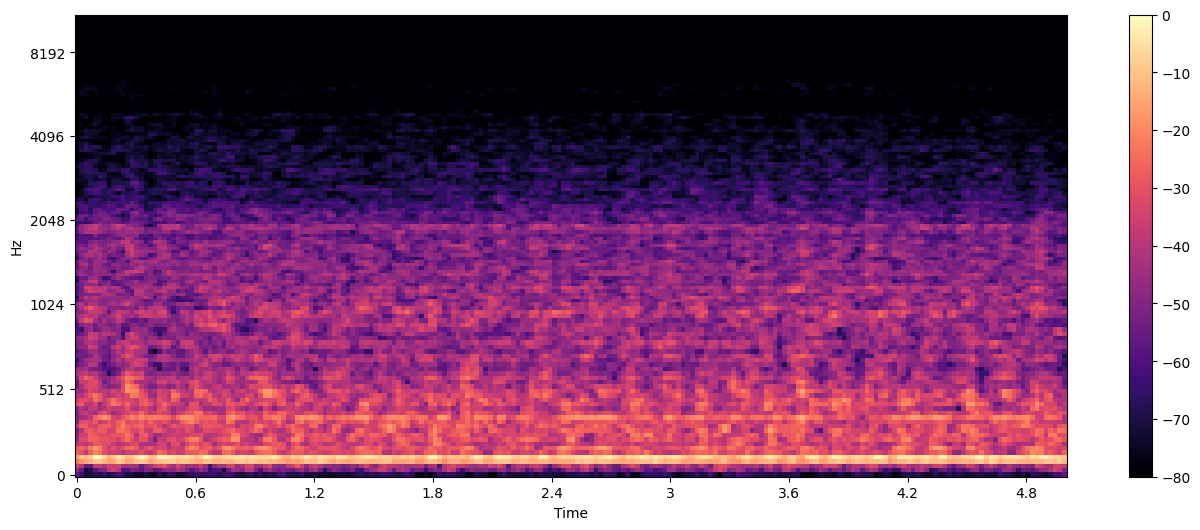

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

# read in the audio files
audio_data_x, sampling_rate_ = librosa.load(dir_list[0], sr=22050)
# create log-mel spectrogram
S = librosa.feature.melspectrogram(y=audio_data_x, sr=22050, n_mels=128, hop_length=512)
S_dB = librosa.amplitude_to_db(S, ref=np. max)
plt.figure()
plt.figure(figsize=(16, 6))
librosa.display.specshow(S_dB, x_axis= "time" , y_axis= "mel")
plt.colorbar()

Alle Spektrogramme werden als Binary ausgeschrieben, um ein schnelles Einlesen zu erlauben.

In [ ]:
from joblib import dump
import os

save_path = "/content/drive/MyDrive/saved/logmel_spektrogramm.joblib"

# Create folder if it doesn’t exist
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Correct usage
dump(spectrogram_, save_path)

['/content/drive/MyDrive/saved/logmel_spektrogramm.joblib']

Load des Binary, welches allen Spektrogrammen entspricht.

In [ ]:
from joblib import dump, load
import os
# Load later
logmel_spectrogram  = load("/content/drive/MyDrive/saved/logmel_spektrogramm.joblib")

Shape aller Spektrogramme.

In [ ]:
logmel_spectrogram = np.array(logmel_spectrogram)

print(type(logmel_spectrogram))
print(logmel_spectrogram.shape)

<class 'numpy.ndarray'>
(2000, 128, 431)


In [ ]:
logmel_spectrogram.shape

(2000, 128, 431)

In [ ]:
logmel_spectrogram  = np.array(logmel_spectrogram)

print(type(logmel_spectrogram))
print(logmel_spectrogram.shape)

<class 'numpy.ndarray'>
(2000, 128, 431)


Herstellung der Klassen

In [ ]:
for i in range(2000):
  s = dir_list[i].split("-")
  s2 = s[3]
  s4 = s2.split(".")
  classes2.append(s4[0])

In [ ]:
X = np.stack(logmel_spectrogram, axis=0)
y = np.array(classes2)

In [ ]:
X.shape

(2000, 128, 431)

Ein Beispiel eines Spektrogramms.

In [ ]:
X[1]

array([[-67.651436, -72.43996 , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-53.74405 , -47.714066, -54.99004 , ..., -80.      , -80.      ,
        -80.      ],
       [-51.095528, -40.341812, -52.32846 , ..., -80.      , -80.      ,
        -80.      ],
       ...,
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ]], dtype=float32)

In [ ]:
y.shape

(2000,)

Ausgabe der Klassen.

In [ ]:
y

array(['35', '22', '10', ..., '34', '21', '17'], dtype='<U2')

Reshape zu zwei Dimensionen.

In [ ]:
X2d = X.reshape(X.shape[0], -1)

In [ ]:
X2d.shape

(2000, 55168)

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X2d , y, test_size=0.2, stratify=y, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 55168), (400, 55168), (1600,), (400,))

##  Zweite Vorgehensweise mit "Linear SVM Classification Model"

### Linear SVM Classification



RandomizedSearchCV

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
import numpy as np

# Define base model
sgd = SGDClassifier(random_state=42,early_stopping=True)

# Define search space
param_grid = {
  "alpha": loguniform(1e-6, 1e-2),
   'learning_rate': ['constant', 'optimal'],
   'loss': ['modified_huber'],
   'eta0': [0.001, 0.01]
}

# Setup RandomizedSearchCV
search = RandomizedSearchCV(
    estimator=sgd,
    param_distributions=param_grid,
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1,
)

# Fit search
search.fit(X2d, y)

print("Best parameters found:")
print(search.best_params_)
print("Best cross-validation accuracy:", search.best_score_)

#https://www.projectguru.in/using-sgd-classifier-to-train-models-with-incremental-learning/

Best parameters found:
{'alpha': np.float64(1.6480446427978994e-05), 'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'modified_huber'}
Best cross-validation accuracy: 0.045


Ausschreiben der besten Parameter als Binary.

In [ ]:
from joblib import dump
import os

best_params = search.best_params_

save_path = "/content/drive/MyDrive/saved/sgd_best_params.joblib"
os.makedirs(os.path.dirname(save_path), exist_ok=True)

dump(best_params, save_path)

['/content/drive/MyDrive/saved/sgd_best_params.joblib']

Einlesen der Binary Datei.

In [ ]:
from joblib import dump, load
import os
# Load later
sgd_best_params = load("/content/drive/MyDrive/saved/sgd_best_params.joblib")

In [ ]:
sgd_best_params

{'alpha': np.float64(1.6480446427978994e-05),
 'eta0': 0.01,
 'learning_rate': 'constant',
 'loss': 'modified_huber'}

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

svm_sgd = make_pipeline(
    StandardScaler(),
    SGDClassifier(
        alpha=np.float64(1.6480446427978994e-05),
        eta0= 0.01,
        loss="modified_huber",
        learning_rate="constant",
        max_iter=1000,
        random_state=42,
        class_weight="balanced"
    )
)

In [ ]:
svm_sgd

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier',
                 SGDClassifier(alpha=np.float64(1.6480446427978994e-05),
                               class_weight='balanced', eta0=0.01,
                               learning_rate='constant', loss='modified_huber',
                               random_state=42))])

Model wird trainiert.

In [ ]:
model_log_loss = svm_sgd.fit(X_train, y_train)

Mehr als 18 Minuten Laufzeit, sollte eher vermieden werden, daher wird SGD bevorzugt:

In [ ]:
#from sklearn.svm import LinearSVC
#from sklearn.pipeline import make_pipeline
#from sklearn.svm import SVC
#from sklearn.preprocessing import StandardScalergoo

# Standard Scaler
#svm_clf = make_pipeline(StandardScaler(),
                        #LinearSVC(C=1, random_state=42))
# Fit
#lin = svm_clf.fit(X_train, y_train)

In [ ]:
from joblib import dump
import os

save_path = "/content/drive/MyDrive/saved/model_log_loss.joblib"

# Create folder if it doesn’t exist
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Correct usage
dump(model_log_loss, save_path)

['/content/drive/MyDrive/saved/model_log_loss.joblib']

In [ ]:
from joblib import dump, load
import os
# Load later
model_log_loss  = load("/content/drive/MyDrive/saved/model_log_loss.joblib")

Accuracy

In [ ]:
# Use it for prediction or scoring, logmel
from sklearn.metrics import accuracy_score
y_test_pred = model_log_loss.predict(X_test)
y_train_pred = model_log_loss.predict(X_train)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Train-Accuracy:", train_acc)
print("Test-Accuracy:", test_acc)

Train-Accuracy: 0.906875
Test-Accuracy: 0.15


Cross Validation Score.

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model_log_loss, X2d, y, cv=cv, n_jobs=-1)

#https://www.educative.io/answers/how-to-implement-crossvalpredict-in-sklearn

In [ ]:
scores

array([0.155 , 0.1675, 0.14  , 0.12  , 0.1575])

In [ ]:
from joblib import dump
import os

save_path = "/content/drive/MyDrive/saved/scores.joblib"

# Create folder if it doesn’t exist
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Correct usage
dump(scores, save_path)

['/content/drive/MyDrive/saved/scores.joblib']

In [ ]:
from joblib import dump, load
import os
# Load later
scores  = load("/content/drive/MyDrive/saved/scores.joblib")

In [ ]:
scores

array([0.155 , 0.1675, 0.14  , 0.12  , 0.1575])

In [ ]:
scores.mean()

np.float64(0.148)

In [ ]:
scores.std()

np.float64(0.01653783540854123)

Cross Validation Predict.

In [ ]:
# logmel
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_train_pred_cross = cross_val_predict(model_log_loss, X2d, y, cv=cv)

#https://www.educative.io/answers/how-to-implement-crossvalpredict-in-sklearn

In [ ]:
y_train_pred_cross

array(['8', '5', '41', ..., '39', '34', '13'], dtype='<U2')

In [ ]:
from joblib import dump
import os

save_path = "/content/drive/MyDrive/saved/y_train_pred_cross.joblib"

# Create folder if it doesn’t exist
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Correct usage
dump(y_train_pred_cross, save_path)

['/content/drive/MyDrive/saved/y_train_pred_cross.joblib']

In [ ]:
from joblib import dump, load
import os
# Load later
y_train_pred_cross  = load("/content/drive/MyDrive/saved/y_train_pred_cross.joblib")

Darstellung von Cross Validation Predict.

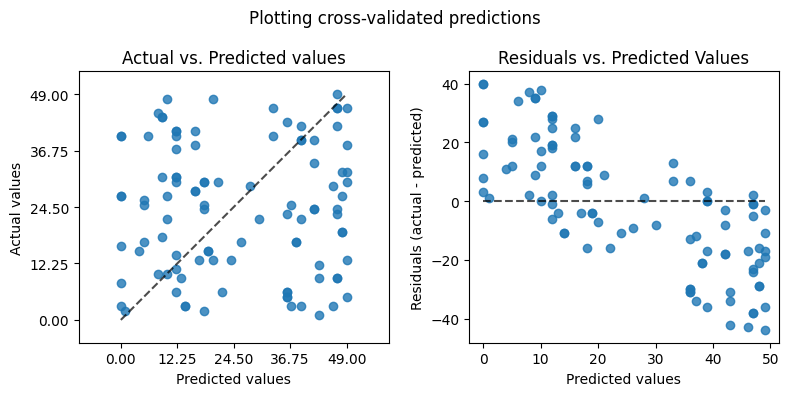

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import PredictionErrorDisplay

# Convert y_test and y_test_pred to numeric types
y_test_numeric = y_test.astype(int)
y_test_pred_numeric = y_train_pred_cross.astype(int)

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_test_numeric,
    y_pred=y_test_pred_numeric,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_test_numeric,
    y_pred=y_test_pred_numeric,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()


#https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_predict.html#sphx-glr-auto-examples-model-selection-plot-cv-predict-py


Darstellung von Cross Validation Predict als Confusion Matrix.



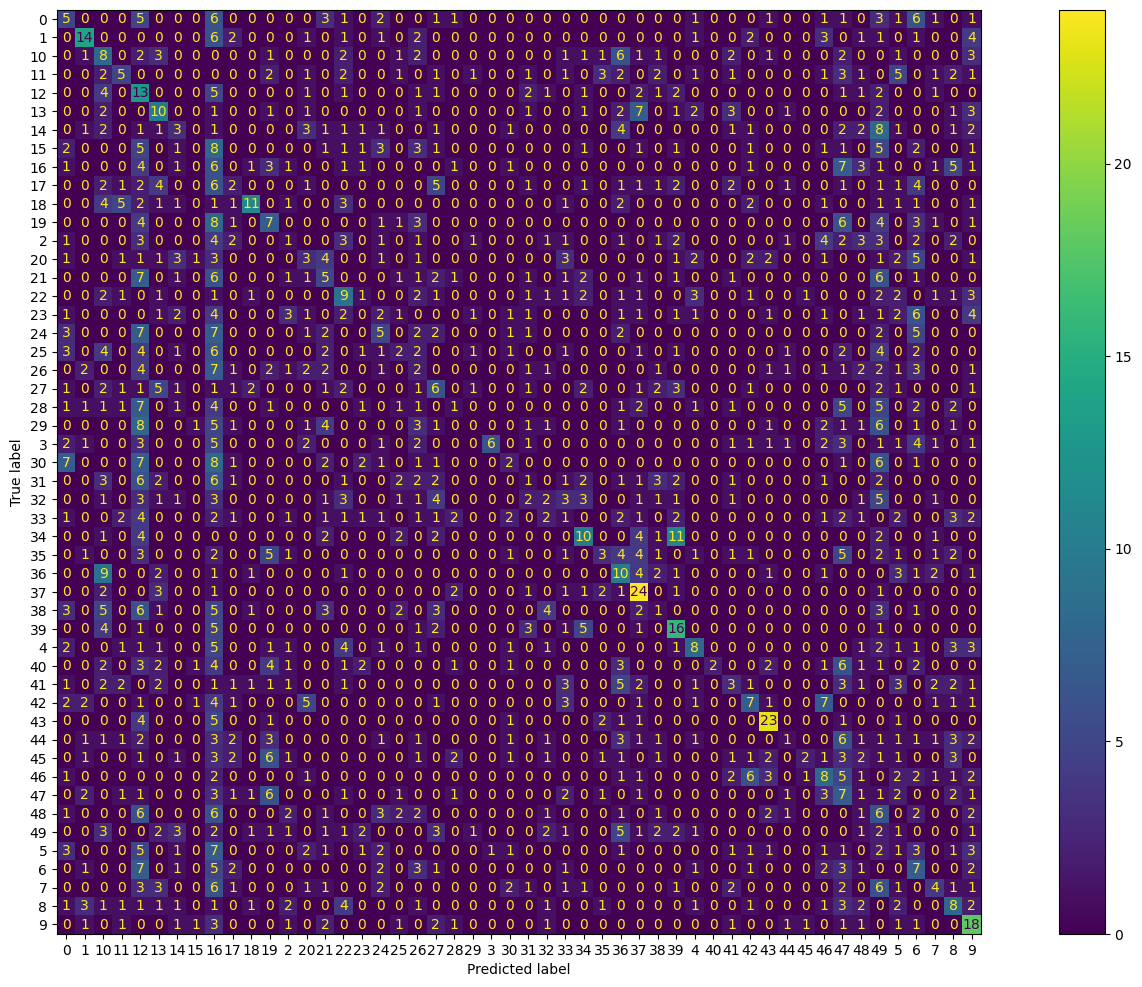

In [ ]:
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

classes = np.unique(classes2)
disp = ConfusionMatrixDisplay.from_predictions(
    y,
    y_train_pred_cross,
    display_labels=classes.astype(int),  # ensures integer tick labels
    values_format='d'
)
disp.figure_.set_size_inches(20, 12)
plt.rcParams.update({'font.size': 7})
plt.show()

Threshold Test

In [ ]:

list = {
  0: "Hund",
  1: "Hahn",
  2: "Schwein",
  3: "Kuh",
  4: "Frosch",
  5: "Katze",
  6: "Henne",
  7: "Insekten",
  8: "Schaf",
  9: "Krähe",
  10: "Regen",
  11: "Wellen",
  12: "Feuer",
  13: "Grillen",
  14: "Vögel",
  15: "Wassertropfen",
  16: "Wind",
  17: "Wassergiessen",
  18: "Toilettenspülung",
  19: "Gewitter",
  20: "Baby",
  21: "Niesen",
  22: "Klatschen",
  23: "Atmen",
  24: "Husten",
  25: "Schritte",
  26: "Lachen",
  27: "Zähneputzen",
  28: "Schnarchen",
  29: "Trinken",
  30: "Türklopfen",
  31: "Mausklick",
  32: "Keyboard",
  33: "Tür",
  34: "Dose öffnen",
  35: "Waschmaschine",
  36: "Staubsauger",
  37: "Alarm",
  38: "Uhrticken",
  39: "Glasbruch",
  40: "Helikopter",
  41: "Säge",
  42: "Sirene",
  43: "Autohupe",
  44: "Motor",
  45: "Zug",
  46: "Kirchenglocken",
  47: "Flugzeug",
  48: "Feuerwerk",
  49: "Handsäge"
}

In [ ]:
cm = disp.confusion_matrix
diagonal_values = np.diag(cm)

print("Diagonal values:", diagonal_values)

Diagonal values: [ 5 14  8  5 13 10  3  0  6  2 11  7  1  3  5  9  0  5  2  2  6  1  0  6
  2  1  2  1 10  3 10 24  1 16  8  2  3  7 23  1  2  8  7  1  2  1  7  4
  8 18]


In [ ]:
labels = disp.display_labels
print(labels)

[ 0  1 10 11 12 13 14 15 16 17 18 19  2 20 21 22 23 24 25 26 27 28 29  3
 30 31 32 33 34 35 36 37 38 39  4 40 41 42 43 44 45 46 47 48 49  5  6  7
  8  9]


In [ ]:
list_name = []
for i in labels:
  a = i
  b = list.get(a)
  list_name.append(b)

Je nach dem welchen Wert man akzeptiert, erhält man mehr oder weniger Klassen.

Insgesamt gesehen ist das Modell schwach, da der Alarm mit 24 von 40 erkannt wird. Wassertropfen, Atmen, Trinken werden gar nicht erkannt.

In [ ]:
# Unterstützung von ChatGPT, names and values von mir
import ipywidgets as widgets
from IPython.display import display

names = list_name
values = diagonal_values

slider = widgets.IntText(
    value=7,
    description='Threshold:',
    disabled=False
)

output = widgets.Output()

def update(change):
    output.clear_output()
    threshold = slider.value

    result = [
    f"{name} ({value})"
    for name, value in sorted(
        zip(names, values),
        key=lambda x: x[1],
        reverse=True
    )
    if value >= threshold
]
    with output:
        for r in result:
            print(r)

slider.observe(update, names="value")
update(None)

display(slider, output)

IntText(value=7, description='Threshold:')

Output()

Accuracy von Cross Validation Predict.

In [ ]:
acc = accuracy_score(y, y_train_pred_cross)
print("accuracy from cross_val_predict:", acc)

accuracy from cross_val_predict: 0.148


Precision and Recall

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predictions
y_pred = model_log_loss.predict(X_test)

# If labels are already numeric, no need for .astype(int)
y_true = y_test

# Precision
print("Precision (macro):", precision_score(y_true, y_pred, average='macro'))
print("Precision (micro):", precision_score(y_true, y_pred, average='micro'))
print("Precision (weighted):", precision_score(y_true, y_pred, average='weighted'))

# Recall
print("Recall (macro):", recall_score(y_true, y_pred, average='macro'))
print("Recall (micro):", recall_score(y_true, y_pred, average='micro'))
print("Recall (weighted):", recall_score(y_true, y_pred, average='weighted'))

# F1
print("F1 (macro):", f1_score(y_true, y_pred, average='macro'))
print("F1 (micro):", f1_score(y_true, y_pred, average='micro'))
print("F1 (weighted):", f1_score(y_true, y_pred, average='weighted'))


Precision (macro): 0.1798145877992425
Precision (micro): 0.15
Precision (weighted): 0.1798145877992425
Recall (macro): 0.15
Recall (micro): 0.15
Recall (weighted): 0.15
F1 (macro): 0.1322289409888959
F1 (micro): 0.15
F1 (weighted): 0.1322289409888959


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

class_report = classification_report(y_true, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.80      0.50      0.62         8
          10       0.29      0.50      0.36         8
          11       0.14      0.12      0.13         8
          12       0.20      0.12      0.15         8
          13       0.08      0.12      0.10         8
          14       0.09      0.12      0.11         8
          15       0.00      0.00      0.00         8
          16       0.00      0.00      0.00         8
          17       0.25      0.12      0.17         8
          18       0.00      0.00      0.00         8
          19       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         8
          20       0.00      0.00      0.00         8
          21       0.00      0.00      0.00         8
          22       0.14      0.12      0.13         8
          23       0.00      0.00      0.00         8
    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## PCA

##  Dritte Vorgehensweise "PCA & SGD Classifier"


Mit dem (2000, 128, 216) → (2000, 55168).

Das ist ~2000 × 55k = 110 million floats
→ ungefähr:

~860 MB for float64

~430 MB for float32

Dies hat genügend Platz, T4 High-RAM hat 16 GB.



Randomized PCA

In [ ]:
from sklearn.decomposition import PCA

rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced_rpca = rnd_pca.fit_transform(X2d)

In [ ]:
explained_variance = rnd_pca.explained_variance_ratio_

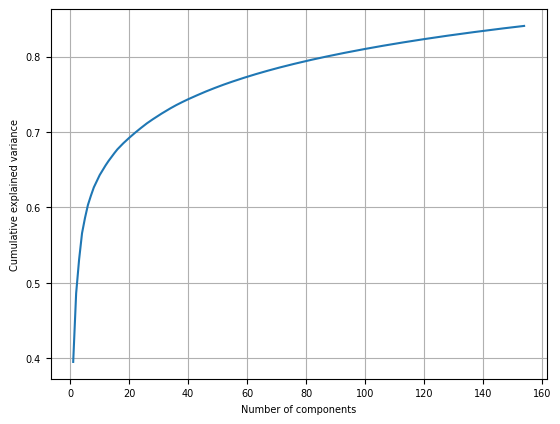

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

cum_var = np.cumsum(explained_variance)
plt.plot(np.arange(1, len(cum_var)+1), cum_var)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid(True)
plt.show()

In [ ]:
X_reduced_rpca

array([[ 3.5334155e+03,  1.4281007e+03, -5.7194806e+02, ...,
         5.5838020e+01,  4.4900898e+01,  9.8844862e+00],
       [ 3.0532078e+03, -1.6544310e+02, -2.1622358e+03, ...,
        -1.8569530e+01,  3.3873451e+01,  1.4450086e+01],
       [ 2.0871389e+03,  6.3653473e+02,  1.5558907e+02, ...,
        -1.6090374e+00, -2.1739073e+01, -9.1873770e+00],
       ...,
       [-1.7150454e+03, -6.9360950e+02,  8.1834917e+00, ...,
         4.2422314e+01,  1.1515603e+02,  6.1355381e+00],
       [-1.7662463e+03, -5.4537793e+02,  3.8292488e+01, ...,
         1.9480032e+01, -1.9457674e+01, -1.7860527e+01],
       [ 1.3068100e+02, -1.3073231e+03, -2.1134273e+02, ...,
         6.8490402e+01, -3.0884150e+01, -1.6014917e+02]], dtype=float32)

In [ ]:
X_reduced_rpca.shape

(2000, 154)

Incremental PCA


In [ ]:
from sklearn.decomposition import IncrementalPCA

n_batches = 10
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X2d, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced_ipca = inc_pca.transform(X2d)

In [ ]:
X_reduced_ipca

array([[ 3.53341640e+03,  1.42810222e+03, -5.71946996e+02, ...,
         2.48071518e+01,  1.98110597e+01,  5.27300382e+01],
       [ 3.05320698e+03, -1.65441209e+02, -2.16228077e+03, ...,
         6.11963071e+01, -1.20479436e+02, -4.49939770e+01],
       [ 2.08713887e+03,  6.36535465e+02,  1.55590331e+02, ...,
         1.04605354e+00, -3.71176843e+01, -3.63047890e+01],
       ...,
       [-1.71504557e+03, -6.93605020e+02,  8.18412382e+00, ...,
        -5.85355397e+00, -1.37068205e+00,  6.66310862e+01],
       [-1.76624665e+03, -5.45378251e+02,  3.82921565e+01, ...,
         2.64941488e+01,  1.78466319e+01,  3.92758504e+01],
       [ 1.30680828e+02, -1.30732266e+03, -2.11351959e+02, ...,
        -1.34953349e+02,  7.94644065e+01, -5.69781893e+01]])

In [ ]:
X_reduced_ipca.shape

(2000, 154)

Train Test Split

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_reduced_rpca, y, test_size=0.2, stratify=y, random_state=42
)

X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((1600, 154), (400, 154), (1600,), (400,))

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X_reduced_ipca, y, test_size=0.2, stratify=y, random_state=42
)

X_train3.shape, X_test3.shape, y_train3.shape, y_test3.shape

((1600, 154), (400, 154), (1600,), (400,))

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

svm_sgd2 = make_pipeline(
    StandardScaler(),
    SGDClassifier(
        alpha=np.float64(1.6480446427978994e-05),
        eta0= 0.01,
        loss="modified_huber",
        learning_rate="constant",
        max_iter=1000,
        random_state=42,
        class_weight="balanced"
    )
)

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

svm_sgd3 = make_pipeline(
    StandardScaler(),
    SGDClassifier(
        alpha=np.float64(1.6480446427978994e-05),
        eta0= 0.01,
        loss="modified_huber",
        learning_rate="constant",
        max_iter=1000,
        random_state=42,
        class_weight="balanced"
    )
)

Model wird trainiert.

In [ ]:
model_log_loss2_r = svm_sgd2.fit(X_train2, y_train2)

In [ ]:
model_log_loss2_i = svm_sgd3.fit(X_train3, y_train3)

Cross Validation Predict.

In [ ]:
# logmel
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

y_train_pred2_r = cross_val_predict(model_log_loss2_r, X_train2, y_train2, cv=5)

In [ ]:
# logmel
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

y_train_pred2_i = cross_val_predict(model_log_loss2_i, X_train3, y_train3, cv=5)

In [ ]:
y_pred2_r = model_log_loss2_r.predict(X_test2)

In [ ]:
y_pred2_i = model_log_loss2_i.predict(X_test3)

Accuracy randomized PCA.

In [ ]:
# Use it for prediction or scoring, logmel
from sklearn.metrics import accuracy_score
y_test_pred2 = model_log_loss2_r.predict(X_test2)
y_train_pred2 = model_log_loss2_r.predict(X_train2)

train_acc2 = accuracy_score(y_train2, y_train_pred2)
test_acc22 = accuracy_score(y_test2, y_test_pred2)

print("Train-Accuracy:", train_acc2)
print("Test-Accuracy:", test_acc22)

Train-Accuracy: 0.68875
Test-Accuracy: 0.2


Accuracy incremental PCA.

In [ ]:
# Use it for prediction or scoring, logmel
from sklearn.metrics import accuracy_score
y_test_pred2 = model_log_loss2_i.predict(X_test3)
y_train_pred2 = model_log_loss2_i.predict(X_train3)

train_acc2 = accuracy_score(y_train3, y_train_pred2)
test_acc22 = accuracy_score(y_test3, y_test_pred2)

print("Train-Accuracy:", train_acc2)
print("Test-Accuracy:", test_acc22)

Train-Accuracy: 0.68875
Test-Accuracy: 0.195


Precision and Recall für randomized PCA.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predictions
y_pred = model_log_loss2_r.predict(X_test2)

# If labels are already numeric, no need for .astype(int)
y_true = y_test

# Precision
print("Precision (macro):", precision_score(y_true, y_pred, average='macro'))
print("Precision (micro):", precision_score(y_true, y_pred, average='micro'))
print("Precision (weighted):", precision_score(y_true, y_pred, average='weighted'))

# Recall
print("Recall (macro):", recall_score(y_true, y_pred, average='macro'))
print("Recall (micro):", recall_score(y_true, y_pred, average='micro'))
print("Recall (weighted):", recall_score(y_true, y_pred, average='weighted'))

# F1
print("F1 (macro):", f1_score(y_true, y_pred, average='macro'))
print("F1 (micro):", f1_score(y_true, y_pred, average='micro'))
print("F1 (weighted):", f1_score(y_true, y_pred, average='weighted'))

Precision (macro): 0.22022455322455323
Precision (micro): 0.2
Precision (weighted): 0.22022455322455323
Recall (macro): 0.2
Recall (micro): 0.2
Recall (weighted): 0.2
F1 (macro): 0.19552107191951046
F1 (micro): 0.2
F1 (weighted): 0.19552107191951046


Classification Report für randomized PCA.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

class_report = classification_report(y_true, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.25      0.21         8
           1       0.50      0.62      0.56         8
          10       0.67      0.75      0.71         8
          11       0.38      0.38      0.38         8
          12       0.27      0.38      0.32         8
          13       1.00      0.12      0.22         8
          14       0.17      0.12      0.14         8
          15       0.25      0.50      0.33         8
          16       0.14      0.12      0.13         8
          17       0.12      0.12      0.12         8
          18       0.75      0.38      0.50         8
          19       0.33      0.38      0.35         8
           2       0.00      0.00      0.00         8
          20       0.00      0.00      0.00         8
          21       0.50      0.50      0.50         8
          22       0.31      0.50      0.38         8
          23       0.00      0.00      0.00         8
    

Precision and Recall for incremental PCA.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predictions
y_pred = model_log_loss2_i.predict(X_test3)

# If labels are already numeric, no need for .astype(int)
y_true = y_test

# Precision
print("Precision (macro):", precision_score(y_true, y_pred, average='macro'))
print("Precision (micro):", precision_score(y_true, y_pred, average='micro'))
print("Precision (weighted):", precision_score(y_true, y_pred, average='weighted'))

# Recall
print("Recall (macro):", recall_score(y_true, y_pred, average='macro'))
print("Recall (micro):", recall_score(y_true, y_pred, average='micro'))
print("Recall (weighted):", recall_score(y_true, y_pred, average='weighted'))

# F1
print("F1 (macro):", f1_score(y_true, y_pred, average='macro'))
print("F1 (micro):", f1_score(y_true, y_pred, average='micro'))
print("F1 (weighted):", f1_score(y_true, y_pred, average='weighted'))

Precision (macro): 0.18714280164280162
Precision (micro): 0.195
Precision (weighted): 0.18714280164280162
Recall (macro): 0.195
Recall (micro): 0.195
Recall (weighted): 0.195
F1 (macro): 0.18671644265607118
F1 (micro): 0.195
F1 (weighted): 0.18671644265607118


Classification Report für incremental PCA.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

class_report = classification_report(y_true, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.38      0.29         8
           1       0.50      0.62      0.56         8
          10       0.50      0.62      0.56         8
          11       0.33      0.38      0.35         8
          12       0.29      0.25      0.27         8
          13       0.22      0.25      0.24         8
          14       0.14      0.12      0.13         8
          15       0.15      0.38      0.21         8
          16       0.33      0.38      0.35         8
          17       0.00      0.00      0.00         8
          18       0.50      0.50      0.50         8
          19       0.22      0.25      0.24         8
           2       0.00      0.00      0.00         8
          20       0.00      0.00      0.00         8
          21       0.17      0.12      0.14         8
          22       0.30      0.38      0.33         8
          23       0.00      0.00      0.00         8
    

Es kann gesagt werden, dass PCA verwendet werden kann, um den Speicher und die Berechnungszeit einsparen zu können. Aufgrund der reduzierten Dimensionen ist der Code schneller ausführbar, die Modelle brauchen weniger Speicher. Die Accuracy, Precission und Recall, F1 sind nicht viel schlechter, wie erwartet. Es soll noch gesehen werden, wie gut dieses Modell zu verwenden ist.  

##  Vierte Vorgehensweise "Polynomial Kernel"

GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'degree': [2, 3, 4, 5],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.001],
    'coef0': [0, 1, 2, 3]
}

svc_poly = SVC(kernel='poly')
search = GridSearchCV(svc_poly, param_grid, cv=5, n_jobs=-1, verbose=1)
search.fit(X_train, y_train)

print("Best parameters:", search.best_params_)
print("Best cross-val score:", search.best_score_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best parameters: {'C': 10, 'coef0': 2, 'degree': 3, 'gamma': 'scale'}
Best cross-val score: 0.35625


Polynomial Kernel

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

# Standard Scaler
poly_kernel_svm_clf = make_pipeline(StandardScaler(),
                                    SVC(kernel="poly", degree=3, coef0=2, C=10, gamma="scale"))

# Fit
fit3 = poly_kernel_svm_clf.fit(X_train, y_train)

Binary Datei schreiben.

In [ ]:
from joblib import dump
import os

save_path = "/content/drive/MyDrive/saved/fit3.joblib"

# Create folder if it doesn’t exist
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Correct usage
dump(fit3, save_path)

['/content/drive/MyDrive/saved/fit3.joblib']

Binary Datei lesen.

In [ ]:
from joblib import dump, load
import os
# Load later
fit3  = load("/content/drive/MyDrive/saved/fit3.joblib")

Accuracy

In [ ]:
# Use it for prediction or scoring, logmel
from sklearn.metrics import accuracy_score
y_test_pred3 = fit3.predict(X_test)
y_train_pred3 = fit3.predict(X_train)

train_acc3 = accuracy_score(y_train, y_train_pred3)
test_acc23 = accuracy_score(y_test, y_test_pred3)

print("Train-Accuracy:", train_acc3)
print("Test-Accuracy:", test_acc23)

Train-Accuracy: 1.0
Test-Accuracy: 0.345


Precision and Recall

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predictions
y_pred = fit3.predict(X_test)

# If labels are already numeric, no need for .astype(int)
y_true = y_test

# Precision
print("Precision (macro):", precision_score(y_true, y_pred, average='macro'))
print("Precision (micro):", precision_score(y_true, y_pred, average='micro'))
print("Precision (weighted):", precision_score(y_true, y_pred, average='weighted'))

# Recall
print("Recall (macro):", recall_score(y_true, y_pred, average='macro'))
print("Recall (micro):", recall_score(y_true, y_pred, average='micro'))
print("Recall (weighted):", recall_score(y_true, y_pred, average='weighted'))

# F1
print("F1 (macro):", f1_score(y_true, y_pred, average='macro'))
print("F1 (micro):", f1_score(y_true, y_pred, average='micro'))
print("F1 (weighted):", f1_score(y_true, y_pred, average='weighted'))

Precision (macro): 0.3585951825951825
Precision (micro): 0.345
Precision (weighted): 0.3585951825951825
Recall (macro): 0.345
Recall (micro): 0.345
Recall (weighted): 0.345
F1 (macro): 0.3287883021691071
F1 (micro): 0.345
F1 (weighted): 0.3287883021691071


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision und Recall mit incremental PCA

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predictions
y_pred =  model_log_loss2_i.predict(X_test3)

# If labels are already numeric, no need for .astype(int)
y_true = y_test3

# Precision
print("Precision (macro):", precision_score(y_true, y_pred, average='macro'))
print("Precision (micro):", precision_score(y_true, y_pred, average='micro'))
print("Precision (weighted):", precision_score(y_true, y_pred, average='weighted'))

# Recall
print("Recall (macro):", recall_score(y_true, y_pred, average='macro'))
print("Recall (micro):", recall_score(y_true, y_pred, average='micro'))
print("Recall (weighted):", recall_score(y_true, y_pred, average='weighted'))

# F1
print("F1 (macro):", f1_score(y_true, y_pred, average='macro'))
print("F1 (micro):", f1_score(y_true, y_pred, average='micro'))
print("F1 (weighted):", f1_score(y_true, y_pred, average='weighted'))

Precision (macro): 0.18714280164280162
Precision (micro): 0.195
Precision (weighted): 0.18714280164280162
Recall (macro): 0.195
Recall (micro): 0.195
Recall (weighted): 0.195
F1 (macro): 0.18671644265607118
F1 (micro): 0.195
F1 (weighted): 0.18671644265607118


Precision und Recall mit randomized PCA

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predictions
y_pred =  model_log_loss2_r.predict(X_test2)

# If labels are already numeric, no need for .astype(int)
y_true = y_test2

# Precision
print("Precision (macro):", precision_score(y_true, y_pred, average='macro'))
print("Precision (micro):", precision_score(y_true, y_pred, average='micro'))
print("Precision (weighted):", precision_score(y_true, y_pred, average='weighted'))

# Recall
print("Recall (macro):", recall_score(y_true, y_pred, average='macro'))
print("Recall (micro):", recall_score(y_true, y_pred, average='micro'))
print("Recall (weighted):", recall_score(y_true, y_pred, average='weighted'))

# F1
print("F1 (macro):", f1_score(y_true, y_pred, average='macro'))
print("F1 (micro):", f1_score(y_true, y_pred, average='micro'))
print("F1 (weighted):", f1_score(y_true, y_pred, average='weighted'))

Precision (macro): 0.22022455322455323
Precision (micro): 0.2
Precision (weighted): 0.22022455322455323
Recall (macro): 0.2
Recall (micro): 0.2
Recall (weighted): 0.2
F1 (macro): 0.19552107191951046
F1 (micro): 0.2
F1 (weighted): 0.19552107191951046


Cross Valiation Predict.

In [ ]:
# logmel
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_train_pred_cross2 = cross_val_predict(fit3, X_train, y_train, cv=cv)

#https://www.educative.io/answers/how-to-implement-crossvalpredict-in-sklearn

Schreiben der Binärdatei.

In [ ]:
from joblib import dump
import os

save_path = "/content/drive/MyDrive/saved/y_train_pred_cross2.joblib"

# Create folder if it doesn’t exist
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Correct usage
dump(y_train_pred_cross2, save_path)

['/content/drive/MyDrive/saved/y_train_pred_cross2.joblib']

Lesen der Binärdatei.

In [ ]:
from joblib import dump, load
import os
# Load later
y_train_pred_cross2  = load("/content/drive/MyDrive/saved/y_train_pred_cross2.joblib")

Darstellung von Cross Validation Predict als Confusion Matrix.

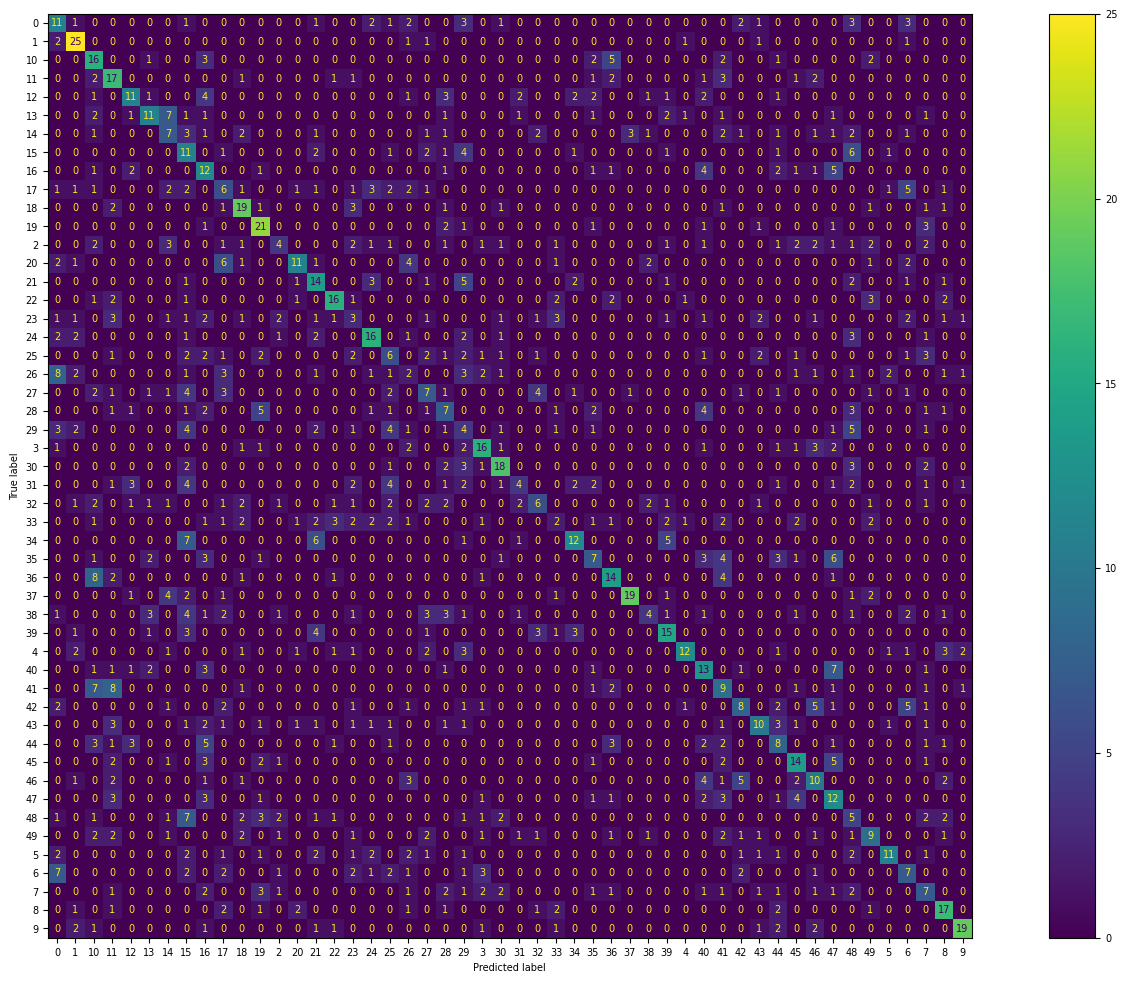

In [ ]:
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

classes = np.unique(classes2)
disp2 = ConfusionMatrixDisplay.from_predictions(
    y_train,
    y_train_pred_cross2,
    display_labels=classes.astype(int),  # ensures integer tick labels
    values_format='d'
)
disp2.figure_.set_size_inches(20, 12)
plt.rcParams.update({'font.size': 7})
plt.show()

Accuracy von Cross Validation Predict.

In [ ]:
acc = accuracy_score(y_train, y_train_pred_cross2)
print("accuracy from cross_val_predict:", acc)

accuracy from cross_val_predict: 0.340625


Threshold Test

In [ ]:
cm = disp2.confusion_matrix
diagonal_values2 = np.diag(cm)

print("Diagonal values:", diagonal_values2)

Diagonal values: [11 25 16 17 11 11  7 11 12  6 19 21  4 11 14 16  3 16  6  2  7  7  4 16
 18  4  6  2 12  7 14 19  4 15 12 13  9  8 10  8 14 10 12  5  9 11  7  7
 17 19]


In [ ]:
labels2 = disp2.display_labels
print(labels2)

[ 0  1 10 11 12 13 14 15 16 17 18 19  2 20 21 22 23 24 25 26 27 28 29  3
 30 31 32 33 34 35 36 37 38 39  4 40 41 42 43 44 45 46 47 48 49  5  6  7
  8  9]


In [ ]:
list_name2 = []
for i in labels2:
  a = i
  b = list.get(a)
  list_name2.append(b)

Je nach dem welchen Wert man akzeptiert, erhält man mehr oder weniger Klassen.

Insgesamt gesehen ist das Modell besser als das lineare Modell. Mit einem Threshold von 7 werden mehr Klassen erkannt. Jedoch mit einem Wert von 25 von 40 dennoch schwach.
Auch was es bedeutet, wenn der Alarm vorhin mit 24 erkannt worden ist nun mit 19 kann diskutiert werden.

In [ ]:
import ipywidgets as widgets
from IPython.display import display

names2 = list_name2
values2 = diagonal_values2

slider = widgets.IntText(
    value=7,
    description='Threshold:',
    disabled=False
)

output = widgets.Output()

def update(change):
    output.clear_output()
    threshold = slider.value

    result = [
        f"{name} ({value})"
        for name, value in sorted(
            zip(names2, values2),
            key=lambda x: x[1],
            reverse=True
        )
        if value >= threshold
    ]
    with output:
        for r in result:
            print(r)

slider.observe(update, names="value")
update(None)

display(slider, output)

IntText(value=7, description='Threshold:')

Output()

##  Fünfte Vorgehensweise "RBF Kernel"

GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'degree': [2, 3, 4, 5],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.001],
    'coef0': [0, 1, 2, 3]
}

svc_poly = SVC(kernel='rbf')
search = GridSearchCV(svc_poly, param_grid, cv=5, n_jobs=-1, verbose=1)
search.fit(X_train, y_train)

print("Best parameters:", search.best_params_)
print("Best cross-val score:", search.best_score_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best parameters: {'C': 10, 'coef0': 0, 'degree': 2, 'gamma': 'scale'}
Best cross-val score: 0.415625


RBF Kernel

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

# Standard Scaler
poly_kernel_svm_clf4 = make_pipeline(StandardScaler(),
                                    SVC(kernel="rbf", degree=2, coef0=0, C=10, gamma="scale"))

# Fit
fit6 = poly_kernel_svm_clf4.fit(X_train, y_train)

Schreiben der Binärdatei.

In [ ]:
from joblib import dump
import os

save_path = "/content/drive/MyDrive/saved/fit6.joblib"

# Create folder if it doesn’t exist
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Correct usage
dump(fit6, save_path)

['/content/drive/MyDrive/saved/fit6.joblib']

Laden der Binätdatei.

In [ ]:
from joblib import dump, load
import os
# Load later
fit6  = load("/content/drive/MyDrive/saved/fit6.joblib")

Train Accuracy und Test Accuracy.

In [ ]:
# Use it for prediction or scoring, logmel
from sklearn.metrics import accuracy_score
y_test_pred6 = fit6.predict(X_test)
y_train_pred6 = fit6.predict(X_train)

train_acc6 = accuracy_score(y_train, y_train_pred6)
test_acc26 = accuracy_score(y_test, y_test_pred6)

print("Train-Accuracy:", train_acc6)
print("Test-Accuracy:", test_acc26)

Train-Accuracy: 0.975
Test-Accuracy: 0.345


Schreiben der Binärdatei.

In [ ]:
from joblib import dump
import os

save_path = "/content/drive/MyDrive/saved/train_acc6.joblib"

# Create folder if it doesn’t exist
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Correct usage
dump(train_acc6 , save_path)

['/content/drive/MyDrive/saved/train_acc6.joblib']

Laden der Binärdatei.

In [ ]:
from joblib import dump, load
import os
# Load later
train_acc6 = load("/content/drive/MyDrive/saved/train_acc6.joblib")

Schreiben der Binärdatei.

In [ ]:
from joblib import dump
import os

save_path = "/content/drive/MyDrive/saved/test_acc26.joblib"

# Create folder if it doesn’t exist
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Correct usage
dump(test_acc26, save_path)

['/content/drive/MyDrive/saved/test_acc26.joblib']

Laden der Binärdatei.

In [ ]:
from joblib import dump, load
import os
# Load later
test_acc26 = load("/content/drive/MyDrive/saved/test_acc26.joblib")

Cross Validation Predict.

In [ ]:
# logmel
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_train_pred_cross4 = cross_val_predict(fit6, X_train, y_train, cv=cv)

#https://www.educative.io/answers/how-to-implement-crossvalpredict-in-sklearn

Schreiben der Binärdatei.

In [ ]:
from joblib import dump
import os

save_path = "/content/drive/MyDrive/saved/y_train_pred_cross4.joblib"

# Create folder if it doesn’t exist
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Correct usage
dump(y_train_pred_cross4, save_path)

['/content/drive/MyDrive/saved/y_train_pred_cross4.joblib']

Lesen der Binärdatei.

In [ ]:
from joblib import dump, load
import os
# Load later
y_train_pred_cross4 = load("/content/drive/MyDrive/saved/y_train_pred_cross4.joblib")

Precision, Recall, F1 Score.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predictions
y_pred =  fit6.predict(X_test)

# If labels are already numeric, no need for .astype(int)
y_true = y_test

# Precision
print("Precision (macro):", precision_score(y_true, y_pred, average='macro'))
print("Precision (micro):", precision_score(y_true, y_pred, average='micro'))
print("Precision (weighted):", precision_score(y_true, y_pred, average='weighted'))

# Recall
print("Recall (macro):", recall_score(y_true, y_pred, average='macro'))
print("Recall (micro):", recall_score(y_true, y_pred, average='micro'))
print("Recall (weighted):", recall_score(y_true, y_pred, average='weighted'))

# F1
print("F1 (macro):", f1_score(y_true, y_pred, average='macro'))
print("F1 (micro):", f1_score(y_true, y_pred, average='micro'))
print("F1 (weighted):", f1_score(y_true, y_pred, average='weighted'))

Precision (macro): 0.3647989526813056
Precision (micro): 0.345
Precision (weighted): 0.3647989526813056
Recall (macro): 0.345
Recall (micro): 0.345
Recall (weighted): 0.345
F1 (macro): 0.332588622805433
F1 (micro): 0.345
F1 (weighted): 0.332588622805433


Darstellung von Cross Validation Predict als Confusion Matrix.

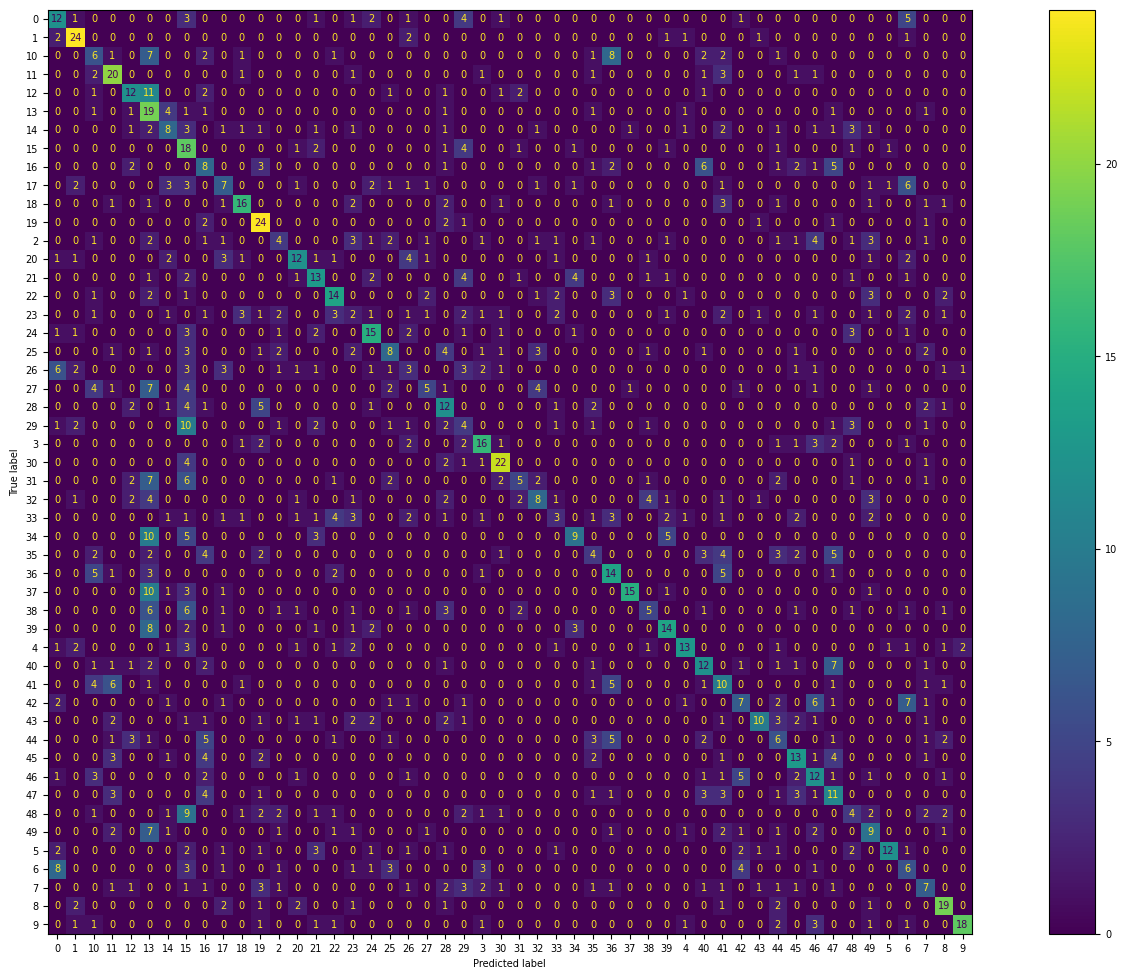

In [ ]:
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

classes = np.unique(classes2)
disp3 = ConfusionMatrixDisplay.from_predictions(
    y_train,
    y_train_pred_cross4,
    display_labels=classes.astype(int),  # ensures integer tick labels
    values_format='d'
)
disp3.figure_.set_size_inches(20, 12)
plt.rcParams.update({'font.size': 7})
plt.show()

Accuracy der Cross Validation Predict.

In [ ]:
acc = accuracy_score(y_train, y_train_pred_cross4)
print("accuracy from cross_val_predict:", acc)

accuracy from cross_val_predict: 0.34375


Threshold Test

In [ ]:
cm = disp3.confusion_matrix
diagonal_values3 = np.diag(cm)

print("Diagonal values:", diagonal_values3)

Diagonal values: [12 24  6 20 12 19  8 18  8  7 16 24  4 12 13 14  2 15  8  3  5 12  4 16
 22  5  8  3  9  4 14 15  5 14 13 12 10  7 10  6 13 12 11  4  9 12  6  7
 19 18]


In [ ]:
labels3 = disp3.display_labels
print(labels3)

[ 0  1 10 11 12 13 14 15 16 17 18 19  2 20 21 22 23 24 25 26 27 28 29  3
 30 31 32 33 34 35 36 37 38 39  4 40 41 42 43 44 45 46 47 48 49  5  6  7
  8  9]


In [ ]:
list_name3 = []
for i in labels3:
  a = i
  b = list.get(a)
  list_name3.append(b)

Je nach dem welchen Wert man akzeptiert, erhält man mehr oder weniger Klassen.

Insgesamt gesehen ist das Modell besser als das lineare Modell. Mit einem Threshold von 7 werden mehr Klassen erkannt. Jedoch mit einem Wert von 24 von 40 dennoch schwach.

In [ ]:
import ipywidgets as widgets
from IPython.display import display

names3 = list_name3
values3 = diagonal_values3

slider = widgets.IntText(
    value=7,
    description='Threshold:',
    disabled=False
)

output = widgets.Output()

def update(change):
    output.clear_output()
    threshold = slider.value

    result = [
        f"{name} ({value})"
        for name, value in sorted(
            zip(names3, values3),
            key=lambda x: x[1],
            reverse=True
        )
        if value >= threshold
    ]
    with output:
        for r in result:
            print(r)

slider.observe(update, names="value")
update(None)

display(slider, output)

IntText(value=7, description='Threshold:')

Output()

KNN (kommt als weiterer Vergleich dran, sobald SVM und ANN,CNN abgeschlossen ist.)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

param_grid = {
    "knn__n_neighbors": list(range(1, 5)),
    "knn__weights": ["uniform", "distance"],
    "knn__p": [1, 2],  # Manhattan vs Euclidean
    # optionally: "knn__metric": ["minkowski", "cosine"]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
gs = GridSearchCV(pipe, param_grid, cv=cv, scoring="accuracy", n_jobs=-1)  # or f1/roc_auc
gs.fit(X, y)

print(gs.best_params_, gs.best_score_)
best_model = gs.best_estimator_

{'knn__n_neighbors': 1, 'knn__p': 1, 'knn__weights': 'uniform'} 0.22999999999999998


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1, weights= "uniform", p=1)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

In [ ]:
from sklearn import metrics
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

# Convert y_test to numeric type
y_test_numeric2 = y_test.astype(int)
y_pred_numeric2 = y_pred.astype(int)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision macro:",metrics.precision_score(y_test_numeric2, y_pred_numeric2, average='macro'))
print("Precision micro:",metrics.precision_score(y_test_numeric2, y_pred_numeric2, average='micro'))
print("Precision weighted:",metrics.precision_score(y_test_numeric2, y_pred_numeric2, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall macro:",metrics.recall_score(y_test_numeric2, y_pred_numeric2, average='macro'))
print("Recall micro:",metrics.recall_score(y_test_numeric2, y_pred_numeric2, average='micro'))
print("Recall weighted:",metrics.recall_score(y_test_numeric2, y_pred_numeric2, average='weighted'))

f1_micro = f1_score(y_test_numeric2, y_pred_numeric2, average='micro')
f1_macro = f1_score(y_test_numeric2, y_pred_numeric2, average='macro')
f1_weighted = f1_score(y_test_numeric2, y_pred_numeric2, average='weighted')

print("Micro-average F1 score:", f1_micro)
print("Macro-average F1 score:", f1_macro)
print("Weighted-average F1 score:", f1_weighted)

Precision macro: 0.3061403535360057
Precision micro: 0.2325
Precision weighted: 0.3061403535360057
Recall macro: 0.2325
Recall micro: 0.2325
Recall weighted: 0.2325
Micro-average F1 score: 0.2325
Macro-average F1 score: 0.21717294507340276
Weighted-average F1 score: 0.21717294507340276


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest (kommt als weiterer Vergleich dran, sobald SVM und ANN,CNN abgeschlossen ist.)

In [ ]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

rnd_clf = RandomForestClassifier(n_estimators=413, n_jobs=-1, random_state=42, max_depth=14, min_samples_leaf=1, min_samples_split=2)
rnd_clf.fit(X_train, y_train)

y_pred = rnd_clf.predict(X_test)

RandomForestClassifier()

In [ ]:
from sklearn import metrics
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

# Convert y_test to numeric type
y_test_numeric2 = y_test.astype(int)
y_pred_numeric2 = y_pred.astype(int)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision macro:",metrics.precision_score(y_test_numeric2, y_pred_numeric2, average='macro'))
print("Precision micro:",metrics.precision_score(y_test_numeric2, y_pred_numeric2, average='micro'))
print("Precision weighted:",metrics.precision_score(y_test_numeric2, y_pred_numeric2, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall macro:",metrics.recall_score(y_test_numeric2, y_pred_numeric2, average='macro'))
print("Recall micro:",metrics.recall_score(y_test_numeric2, y_pred_numeric2, average='micro'))
print("Recall weighted:",metrics.recall_score(y_test_numeric2, y_pred_numeric2, average='weighted'))

f1_micro = f1_score(y_test_numeric2, y_pred_numeric2, average='micro')
f1_macro = f1_score(y_test_numeric2, y_pred_numeric2, average='macro')
f1_weighted = f1_score(y_test_numeric2, y_pred_numeric2, average='weighted')

print("Micro-average F1 score:", f1_micro)
print("Macro-average F1 score:", f1_macro)
print("Weighted-average F1 score:", f1_weighted)

Precision macro: 0.35101318779259955
Precision micro: 0.335
Precision weighted: 0.35101318779259955
Recall macro: 0.335
Recall micro: 0.335
Recall weighted: 0.335
Micro-average F1 score: 0.335
Macro-average F1 score: 0.3083354049758142
Weighted-average F1 score: 0.3083354049758142


In [ ]:
param_dist = {
  'n_estimators': randint(100, 500),
  'max_depth': randint(3, 15),
  'min_samples_split': randint(2, 10),
  'min_samples_leaf': randint(1, 5)
}


# Create a random forest classifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(
  rf, param_distributions=param_dist,
  n_iter=10, cv=5, scoring='accuracy',
  n_jobs=-1, random_state=42
)

In [ ]:
rand_search.fit(X, y)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b43db55cfb0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b43db55f8c0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b43db55f5f0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b43db4e5730>},
                   random_state=42, scoring='accuracy')

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 413}


In [ ]:
rand_search.fit(X2d, y)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b43db55cfb0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b43db55f8c0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b43db55f5f0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b43db4e5730>},
                   random_state=42, scoring='accuracy')

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 413}


## Neuronales Netz (Begründung warum CNN und nicht ein einfaches ANN)

CNN

ANN

In [ ]:
print(dir_list[0])

3-151269-A-35.wav


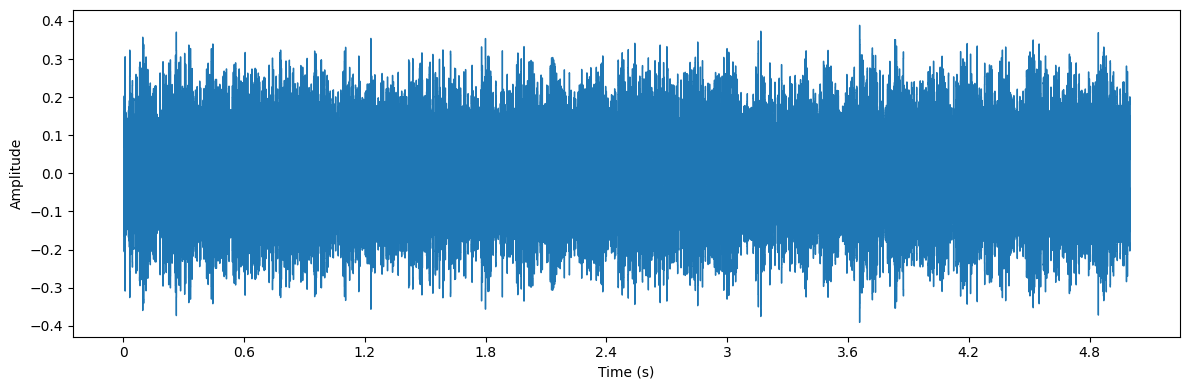

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio_list2[0])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

In [ ]:
print(dir_list[1])

3-149465-A-22.wav


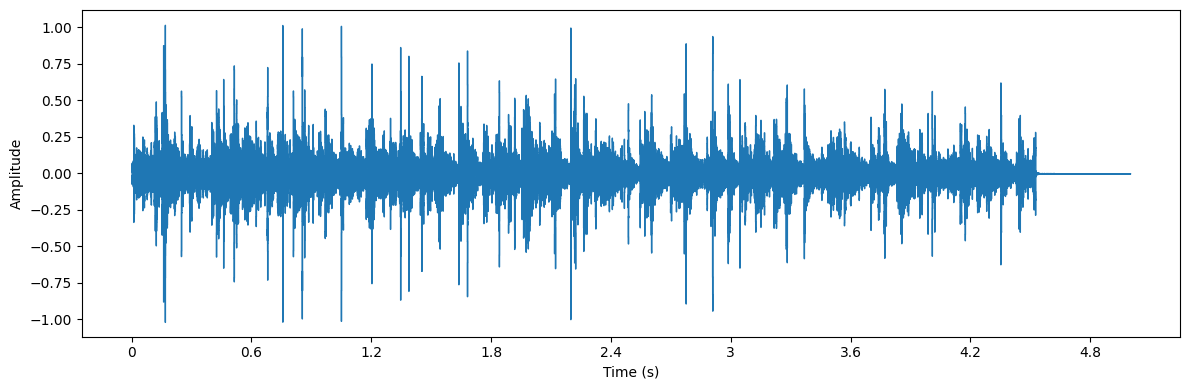

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio_list2[1])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

Rename the audio files to a human-readable format. Also to be used for reading the predictions easily.

Example, the end tag 32 describes the class, which is "breaking glass":
1-137-A-32

The class description goes from 0-49 which is about all 50 classes.

$$
{\scriptsize
\begin{array}{|c|c|c|c|c|c|c|c|c|c|}
\hline
Klasse & Beschreibung &
Klasse & Beschreibung &
Klasse & Beschreibung &
Klasse & Beschreibung &
Klasse & Beschreibung \\ \hline
0 & Hund & 10 & Regen & 20 & Baby & 30 & Türklopfen & 40 & Helikopter \\
1 & Hahn & 11 & Wellen & 21 & Niesen & 31 & Mausklick & 41 & Säge \\
2 & Schwein & 12 & Feuer & 22 & Klatschen & 32 & Keyboard & 42 & Sirene \\
3 & Kuh & 13 & Grillen & 23 & Atmen & 33 & Tür & 43 & Autohupe \\
4 & Frosch & 14 & Vögel & 24 & Husten & 34 & Dose öffnen & 44 & Motor \\
5 & Katze & 15 & Wassertropfen & 25 & Schritte & 35 & Waschmaschine & 45 & Zug \\
6 & Henne & 16 & Wind & 26 & Lachen & 36 & Staubsauger & 46 & Kirchenglocken \\
7 & Insekten & 17 & Wasser giessen & 27 & Zähneputzen & 37 & Alarm & 47 & Flugzeug \\
8 & Schaf & 18 & Toilettenspülung & 28 & Schnarchen & 38 & Uhrticken & 48 & Feuerwerk \\
9 & Krähe & 19 & Gewitter & 29 & Trinken & 39 & Glasbruch & 49 & Handsäge \\
\hline
\end{array}
}
$$

In [ ]:
path = "/content/drive/My Drive/audio/"
dir_list = os.listdir(path)
alter_name = os.path.join(path, dir_list[0])
print(alter_name)

list = {
  0: "Hund",
  1: "Hahn",
  2: "Schwein",
  3: "Kuh",
  4: "Frosch",
  5: "Katze",
  6: "Henne",
  7: "Insekten",
  8: "Schaf",
  9: "Krähe",
  10: "Regen",
  11: "Wellen",
  12: "Feuer",
  13: "Grillen",
  14: "Vögel",
  15: "Wassertropfen",
  16: "Wind",
  17: "Wassergiessen",
  18: "Toilettenspülung",
  19: "Gewitter",
  20: "Baby",
  21: "Niesen",
  22: "Klatschen",
  23: "Atmen",
  24: "Husten",
  25: "Schritte",
  26: "Lachen",
  27: "Zähneputzen",
  28: "Schnarchen",
  29: "Trinken",
  30: "Türklopfen",
  31: "Mausklick",
  32: "Keyboard",
  33: "Tür",
  34: "Dose öffnen",
  35: "Waschmaschine",
  36: "Staubsauger",
  37: "Alarm",
  38: "Uhrticken",
  39: "Glasbruch",
  40: "Helikopter",
  41: "Säge",
  42: "Sirene",
  43: "Autohupe",
  44: "Motor",
  45: "Zug",
  46: "Kirchenglocken",
  47: "Flugzeug",
  48: "Feuerwerk",
  49: "Handsäge"
}

/content/drive/My Drive/audio/Zug.wav


In [ ]:
list = {
  0: "Hund",
  1: "Hahn",
  2: "Schwein",
  3: "Kuh",
  4: "Frosch",
  5: "Katze",
  6: "Henne",
  7: "Insekten",
  8: "Schaf",
  9: "Krähe",
  10: "Regen",
  11: "Wellen",
  12: "Feuer",
  13: "Grillen",
  14: "Vögel",
  15: "Wassertropfen",
  16: "Wind",
  17: "Wassergiessen",
  18: "Toilettenspülung",
  19: "Gewitter",
  20: "Baby",
  21: "Niesen",
  22: "Klatschen",
  23: "Atmen",
  24: "Husten",
  25: "Schritte",
  26: "Lachen",
  27: "Zähneputzen",
  28: "Schnarchen",
  29: "Trinken",
  30: "Türklopfen",
  31: "Mausklick",
  32: "Keyboard",
  33: "Tür",
  34: "Dose öffnen",
  35: "Waschmaschine",
  36: "Staubsauger",
  37: "Alarm",
  38: "Uhrticken",
  39: "Glasbruch",
  40: "Helikopter",
  41: "Säge",
  42: "Sirene",
  43: "Autohupe",
  44: "Motor",
  45: "Zug",
  46: "Kirchenglocken",
  47: "Flugzeug",
  48: "Feuerwerk",
  49: "Handsäge"
}

In [ ]:
import os
dir_list = os.listdir(path)

FileNotFoundError: [Errno 2] No such file or directory: ''

In [ ]:
k=1
for i in range(len(dir_list)-1):
  alter_name = os.path.join(path, dir_list[k])
  a = dir_list[k].split("-")
  #print(a[3][0:-4])
  tag = int(a[3][0:-4])
  b = list.get(tag)
  #print(b)
  c=str(b+".wav")
  neuer_name = os.path.join(path, c)
  os.rename(alter_name, neuer_name)
  k=k+1